## IMPORTING THE LIBRARIES

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## IMPORTING AND ANALYSIS THE DATASET

In [14]:
dataset = pd.read_csv('WineQT.csv')

In [15]:
print(dataset.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [16]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [17]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [18]:
dataset.isnull().sum()                                  #early info of the dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

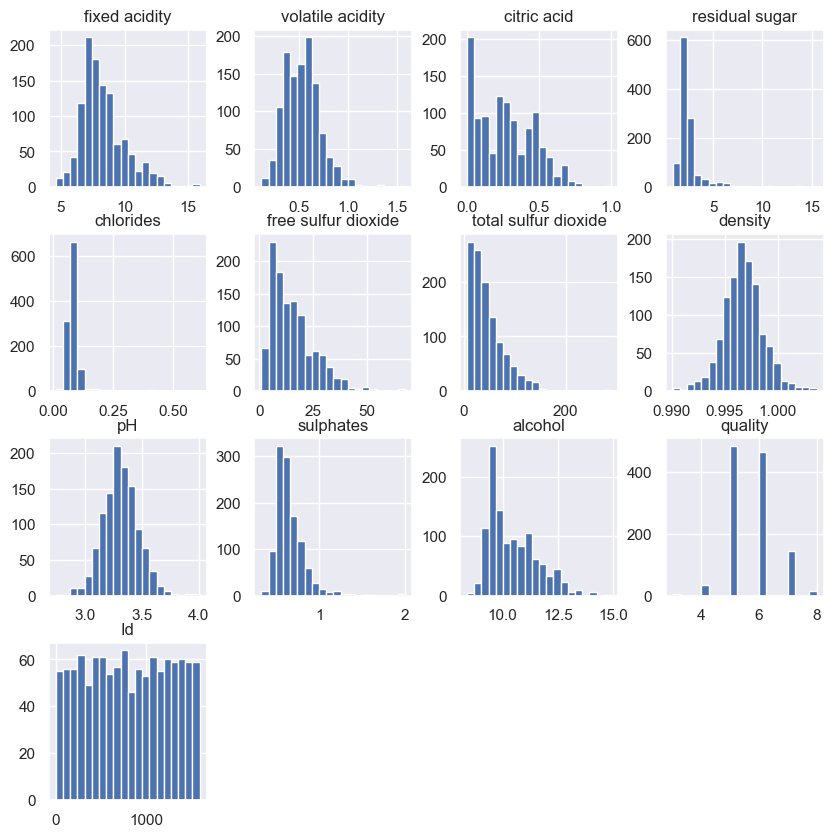

In [19]:
dataset.hist(bins=20, figsize=(10, 10))                 #count of records for intervals of value
plt.show()

In [20]:
# plt.bar(dataset['quality'], dataset['alcohol'])         #to count no of records for each quality
# plt.xlabel('quality')
# plt.ylabel('alcohol')
# plt.show()

In [21]:
print(dataset['quality'])

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

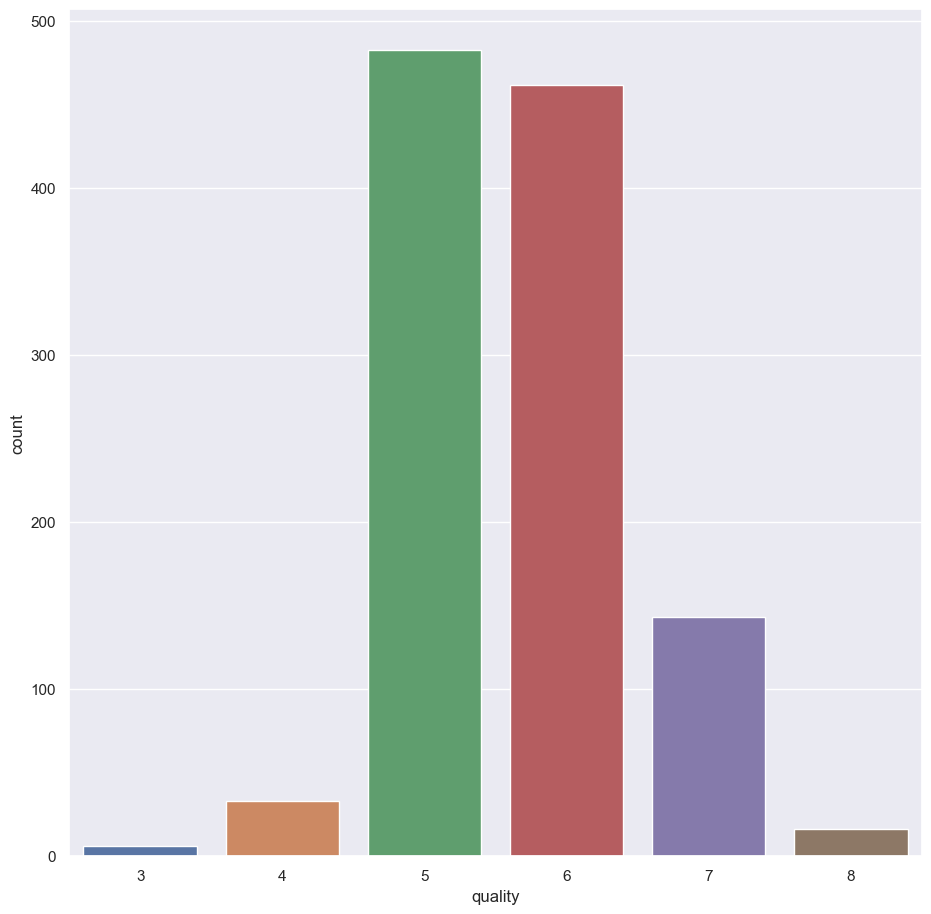

In [22]:
import seaborn as sns

sns.set(rc={'figure.figsize': (11, 11)})
sns.countplot(data=dataset, x='quality')

## DATASET MODIFICATION

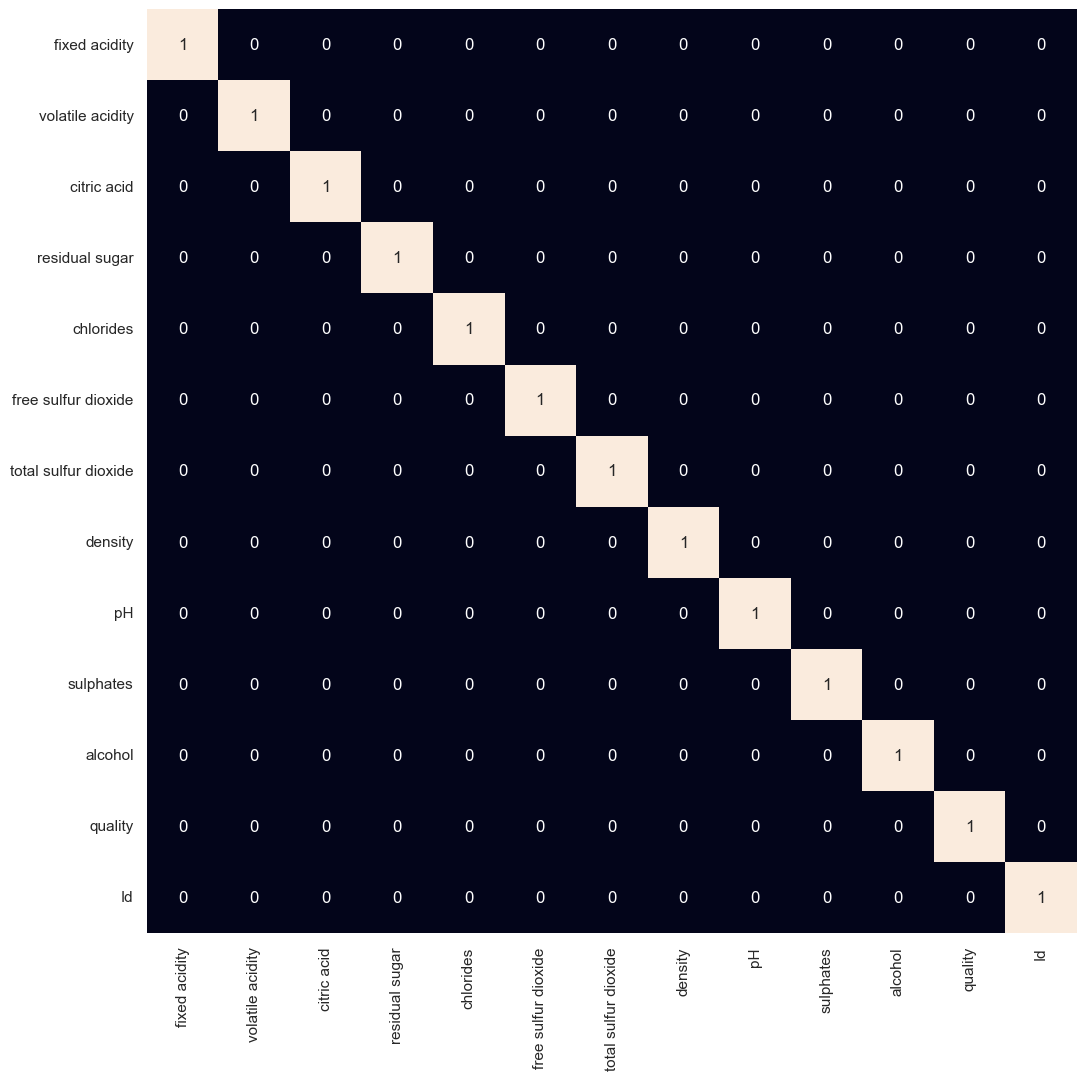

In [23]:
plt.figure(figsize=(12, 12))
sb.heatmap(dataset.corr() > 0.7, annot=True, cbar=False)      #to check if any columns are related
plt.show()
dataset = dataset.drop('total sulfur dioxide', axis=1)        #dropping column that is to bbe deleted

In [24]:
dataset['best quality'] = [1 if x > 5 else 0 for x in dataset.quality]
#print(dataset)

In [25]:
# dataset.replace({'white': 1, 'red': 0}, inplace=True)         #LabelEncoding
# print(dataset)

## SPLITTING TRAINING SET AND TEST SET

In [26]:
features = dataset.drop(['quality', 'best quality', 'Id'], axis=1)
target = dataset['best quality']

# print(features)
# print(target)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(914, 10)
(914,)
(229, 10)
(229,)


In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# TRAINING MODEL

### Linear Regression

In [31]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train)

### KNN Nearest Neighbours

In [32]:
# from sklearn.neighbors import KNeighborsClassifier
# classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier.fit(X_train, y_train)

### SVM

In [33]:
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'linear', random_state = 0)
# classifier.fit(X_train, y_train)

### Kernel SVM

In [34]:
# from sklearn.svm import SVC
# classifier = SVC(kernel = 'rbf', random_state = 0)
# classifier.fit(X_train, y_train)

### Naive Bayes

In [35]:
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)

### Decision Tree

In [36]:
# from sklearn.tree import DecisionTreeClassifier
# classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

### Random Forest

In [37]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
# classifier.fit(X_train, y_train)

### XGBOOST

In [38]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## PREDICTING TEST SET

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print('Training Accuracy : ', metrics.roc_auc_score(y_train, classifier.predict(X_train)))
print('Validation Accuracy : ', metrics.roc_auc_score(y_test, classifier.predict(X_test)))

Training Accuracy :  1.0
Validation Accuracy :  0.7842248062015504


In [40]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Correct: ", cm[0][0] + cm[1][1])
print("Incorrect: ", cm[0][1] + cm[1][0])

[[ 77  23]
 [ 26 103]]
Correct:  180
Incorrect:  49


## Applying k-Fold Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Max accuracy: {:.2f} %".format(max(accuracies)*100))
print("Max accuracy: {:.2f} %".format(min(accuracies)*100))
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Max accuracy: 83.52 %
Max accuracy: 68.48 %
Accuracy: 77.58 %
Standard Deviation: 4.16 %


## PREDICTING SINGLE VALUE

In [42]:
# gender = int(input("Male(1) / Female(0): "))
# age = int(input("Enter age: "))
# salary = int(input("Enter salary: "))

# print(classifier.predict(sc.transform([[gender,age,salary]])))

In [43]:
print(metrics.classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       100
           1       0.82      0.80      0.81       129

    accuracy                           0.79       229
   macro avg       0.78      0.78      0.78       229
weighted avg       0.79      0.79      0.79       229



## REPORT

### Logistic Regression:  75.38 %

### KNN Nearest Neighbours: 70.68 %

### SVM: 74.51 %

### KERNEL SVM: 75.71 %




### Naive Bayes:  73.41 %

### Decision Trees: 70.67 %

### Random Forest: 76.92 %

### XGBOOST: 77.46 %

# OPTIMAL MODELS:


### XGBOOST

### Random Forest